In [1]:
import numpy as np

import pandas as pd

import matplotlib.pylab as plt

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
file = pd.read_csv('../data/Copy of 2024-02-20_CTCF-FRAPs - Sheet1.csv')
#file['lifetime [sec]']=file['lifetime']
file

,protein,condition,organism,celltype,lifetime,1/k_on,fraction-bound,method,notes,paper,link
0,CTCF,"WT, G1",mouse,mESC C59,"61, sec",NaN,0.49,SPT,"double exponential fit, fraction bound (specif...","Hansen, 2017",https://elifesciences.org/articles/25776
1,CTCF,WT,mouse,mESC C87,"63, sec",NaN,0.49,SPT,"by eye, it looks like their fit estimate is an...","Hansen, 2017",https://elifesciences.org/articles/25776
2,CTCF,WT,human,U2OS C32,"72, sec",NaN,0.387,SPT,NaN,"Hansen, 2017",https://elifesciences.org/articles/25776
3,CTCF,WT,mouse,"mESC, C87 Halo-mCTCF","247, sec",NaN,NaN,FRAP,11min 0.5hz,"Hansen, 2017",NaN
4,CTCF,WT,mouse,"mESC, C87 Halo-mCTCF","183, sec",NaN,NaN,FRAP,"5min, 1hz","Hansen, 2017",NaN
5,CTCF,WT,mouse,"mESC, C59 Halo-mCTCF","263, sec",NaN,NaN,FRAP,11min 0.5hz,"Hansen, 2017",NaN
6,CTCF,WT,mouse,"mESC, C59 Halo-mCTCF","197, sec",NaN,NaN,FRAP,"5min, 1hz","Hansen, 2017",NaN
7,CTCF,WT,human,"U2OS, interphase","reported as ""a few minutes"" (by eye ~ 300, sec)",NaN,NaN,FRAP,"FRAP performed by Hansen, likely in same U2OS ...","Oomen, 2019",https://genome.cshlp.org/content/29/2/236/F6.l...
8,CTCF,WT,human,"U2OS, interphase",NaN,NaN,0.545,SPT,spot-on software,"Oomen, 2019",https://genome.cshlp.org/content/29/2/236/F6.l...
9,CTCF,WT,human,HeLa,"~150, sec",NaN,NaN,FRAP+eyeball,TODO: quantify more carefully. recovery curve ...,"Li, 2019",https://www.nature.com/articles/s41467-019-089...


In [3]:
specific_condition = ['WT, G1','WT']

# Use boolean indexing to filter rows with 'cell type' column matching specific values
filtered_df = file[file['condition'].isin(specific_condition)]
filtered_df

,protein,condition,organism,celltype,lifetime,1/k_on,fraction-bound,method,notes,paper,link
0,CTCF,"WT, G1",mouse,mESC C59,"61, sec",NaN,0.49,SPT,"double exponential fit, fraction bound (specif...","Hansen, 2017",https://elifesciences.org/articles/25776
1,CTCF,WT,mouse,mESC C87,"63, sec",NaN,0.49,SPT,"by eye, it looks like their fit estimate is an...","Hansen, 2017",https://elifesciences.org/articles/25776
2,CTCF,WT,human,U2OS C32,"72, sec",NaN,0.387,SPT,NaN,"Hansen, 2017",https://elifesciences.org/articles/25776
3,CTCF,WT,mouse,"mESC, C87 Halo-mCTCF","247, sec",NaN,NaN,FRAP,11min 0.5hz,"Hansen, 2017",NaN
4,CTCF,WT,mouse,"mESC, C87 Halo-mCTCF","183, sec",NaN,NaN,FRAP,"5min, 1hz","Hansen, 2017",NaN
5,CTCF,WT,mouse,"mESC, C59 Halo-mCTCF","263, sec",NaN,NaN,FRAP,11min 0.5hz,"Hansen, 2017",NaN
6,CTCF,WT,mouse,"mESC, C59 Halo-mCTCF","197, sec",NaN,NaN,FRAP,"5min, 1hz","Hansen, 2017",NaN
7,CTCF,WT,human,"U2OS, interphase","reported as ""a few minutes"" (by eye ~ 300, sec)",NaN,NaN,FRAP,"FRAP performed by Hansen, likely in same U2OS ...","Oomen, 2019",https://genome.cshlp.org/content/29/2/236/F6.l...
8,CTCF,WT,human,"U2OS, interphase",NaN,NaN,0.545,SPT,spot-on software,"Oomen, 2019",https://genome.cshlp.org/content/29/2/236/F6.l...
9,CTCF,WT,human,HeLa,"~150, sec",NaN,NaN,FRAP+eyeball,TODO: quantify more carefully. recovery curve ...,"Li, 2019",https://www.nature.com/articles/s41467-019-089...


In [4]:
table_s = file[['organism','celltype', 'paper','fraction-bound','method','lifetime']]
table_s = table_s.drop_duplicates(keep='first')
table_s

,organism,celltype,paper,fraction-bound,method,lifetime
0,mouse,mESC C59,"Hansen, 2017",0.49,SPT,"61, sec"
1,mouse,mESC C87,"Hansen, 2017",0.49,SPT,"63, sec"
2,human,U2OS C32,"Hansen, 2017",0.387,SPT,"72, sec"
3,mouse,"mESC, C87 Halo-mCTCF","Hansen, 2017",NaN,FRAP,"247, sec"
4,mouse,"mESC, C87 Halo-mCTCF","Hansen, 2017",NaN,FRAP,"183, sec"
5,mouse,"mESC, C59 Halo-mCTCF","Hansen, 2017",NaN,FRAP,"263, sec"
6,mouse,"mESC, C59 Halo-mCTCF","Hansen, 2017",NaN,FRAP,"197, sec"
7,human,"U2OS, interphase","Oomen, 2019",NaN,FRAP,"reported as ""a few minutes"" (by eye ~ 300, sec)"
8,human,"U2OS, interphase","Oomen, 2019",0.545,SPT,NaN
9,human,HeLa,"Li, 2019",NaN,FRAP+eyeball,"~150, sec"


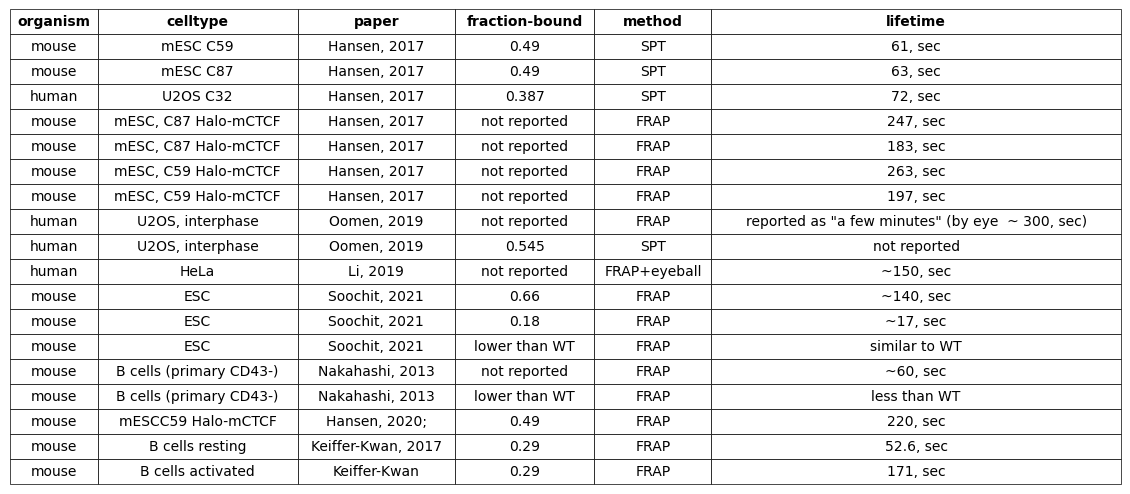

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('tight')
ax.axis('off')
font_size = 10
#table_s = table_s.dropna(subset=['lifetime [sec]'])
table_s = table_s.dropna(subset=['paper'])
new_table_s = table_s[['organism', 'celltype', 'paper', 'fraction-bound', 'method', 'lifetime']]
new_table_sm = new_table_s.fillna('not reported', inplace=True)
# Adjust cellLoc to 'center' or 'top' to stretch cells in the y-direction
table = ax.table(cellText=new_table_s.values, colLabels=new_table_s.columns, loc='center', cellLoc='center', fontsize=10)

table.auto_set_font_size(False)
table.set_fontsize(font_size)

# Enable text wrapping for all cells
for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_text_props(fontweight='bold')
    cell.set_linewidth(0.5)
    cell.set_edgecolor('black')
    cell.set_text_props(wrap=True)  # Enable text wrapping

# Increase the height of the rows in the table
cell_height = 0.1  # Adjust this value as needed
table.scale(1, 1.5)  # Increase row height by a factor of 3

# Set the width of the 'celltype' column to be wider than the rest
col_widths = [0.1, 0.2, 0.1, 0.1, 0.1, 0.1]  # Adjust the width of each column as needed
for i, width in enumerate(col_widths):
    table.auto_set_column_width(col=i)
#table.set_col_width(1, 0.2)  # Set the width of the 'celltype' column

plt.savefig('../figs/lifetime_table_modified.pdf', format='pdf', bbox_inches='tight')
plt.show()


In [34]:
file = pd.read_csv('../data/Copy of 2024-02-20_CTCF-FRAPs_a - Sheet1.csv')

specific_condition = ['WT, G1','WT']

# Use boolean indexing to filter rows with 'cell type' column matching specific values
filtered_df = file[file['condition'].isin(specific_condition)]
filtered_df
table_s = file[['organism','celltype', 'paper','fraction-bound','method','lifetime']]
table_s = table_s.drop_duplicates(keep='first')
table_s['fraction-bound'].fillna(0.5, inplace=True)
table_s['lifetime [sec]'] = pd.to_numeric(table_s['lifetime'], errors='coerce')
table_s = table_s.dropna(subset=['lifetime [sec]'])
table_s['fraction-bound'] = pd.to_numeric(table_s['fraction-bound'], errors='coerce')
table_s['unbound'] = (table_s['lifetime [sec]'] / table_s['fraction-bound']) - table_s['lifetime [sec]']
table_s

,organism,celltype,paper,fraction-bound,method,lifetime,lifetime [sec],unbound
0,mouse,mESC C59,"Hansen, 2017",0.490,SPT,61.00,61.0,63.489796
1,mouse,mESC C87,"Hansen, 2017",0.490,SPT,63,63.0,65.571429
2,human,U2OS C32,"Hansen, 2017",0.387,SPT,72,72.0,114.046512
3,mouse,"mESC, C87 Halo-mCTCF","Hansen, 2017",0.500,FRAP,247,247.0,247.000000
4,mouse,"mESC, C87 Halo-mCTCF","Hansen, 2017",0.500,FRAP,183,183.0,183.000000
5,mouse,"mESC, C59 Halo-mCTCF","Hansen, 2017",0.500,FRAP,263,263.0,263.000000
6,mouse,"mESC, C59 Halo-mCTCF","Hansen, 2017",0.500,FRAP,197,197.0,197.000000
7,human,"U2OS, interphase","Oomen, 2019",0.500,FRAP,300,300.0,300.000000
9,human,HeLa,"Li, 2019",0.500,FRAP+eyeball,150,150.0,150.000000
10,mouse,ESC,"Soochit, 2021",0.660,FRAP,140,140.0,72.121212


In [36]:
specific_cell_types = ['mESC C59', 'U2OS C32', 'mESC, C59 Halo-mCTCF', 'U2OS, interphase','HeLa','ESC','B cells (primary CD43-)',
                      'mESCC59 Halo-mCTCF','B cells resting','B cells activated']

# Use boolean indexing to filter rows with 'cell type' column matching specific values
table_s_new = table_s[table_s['celltype'].isin(specific_cell_types)].reset_index()

# Now 'filtered_df' contains only rows with 'cell type' column matching the specified values
table_s_new

,index,organism,celltype,paper,fraction-bound,method,lifetime,lifetime [sec],unbound
0,0,mouse,mESC C59,"Hansen, 2017",0.490,SPT,61.00,61.0,63.489796
1,2,human,U2OS C32,"Hansen, 2017",0.387,SPT,72,72.0,114.046512
2,5,mouse,"mESC, C59 Halo-mCTCF","Hansen, 2017",0.500,FRAP,263,263.0,263.000000
3,6,mouse,"mESC, C59 Halo-mCTCF","Hansen, 2017",0.500,FRAP,197,197.0,197.000000
4,7,human,"U2OS, interphase","Oomen, 2019",0.500,FRAP,300,300.0,300.000000
5,9,human,HeLa,"Li, 2019",0.500,FRAP+eyeball,150,150.0,150.000000
6,10,mouse,ESC,"Soochit, 2021",0.660,FRAP,140,140.0,72.121212
7,11,mouse,ESC,"Soochit, 2021",0.180,FRAP,17,17.0,77.444444
8,15,mouse,B cells (primary CD43-),"Nakahashi, 2013",0.500,FRAP,60,60.0,60.000000
9,18,mouse,mESCC59 Halo-mCTCF,"Hansen, 2020;",0.490,FRAP,220,220.0,228.979592


/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "ppt" which is no longer supported as of 3.3 and will become an error in 3.6


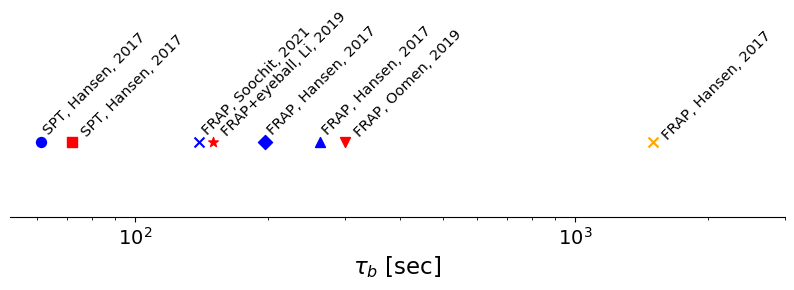

In [61]:
table_s_new['lifetime [sec]'] = pd.to_numeric(table_s_new['lifetime [sec]'], errors='coerce')

table_s = table_s_new.dropna(subset=['lifetime [sec]'])

marker_styles = ['o', 's', '^', 'D', 'v', '*', 'x']  
#print(table_s)
plt.figure(figsize=(10,1.95))
for i, marker in enumerate(marker_styles):
    #print(i)
    if table_s.iloc[i]['organism']=='human':
        color = 'red'
        xytext=(5,4.15)
        #print('human')
    else:
        color = 'blue'
        xytext=(0.05,5.15)
        #print('mouse')
    plt.scatter( table_s.iloc[i]['lifetime [sec]'],0.81,
                color=color, marker=marker, s= 51)

    plt.annotate('%s, %s' % (table_s.iloc[i]['method'], table_s.iloc[i]['paper']),
                 ( table_s.iloc[i]['lifetime [sec]'],0.81),
                 textcoords="offset points", xytext=xytext, ha='left', fontsize=10.51, rotation=45)
plt.scatter( 60*25,0.81,
                color='orange', marker=marker, s= 51)

plt.annotate('%s, %s' % ('FRAP', 'Hansen, 2017'),
             ( 60*25,0.81),
             textcoords="offset points", xytext=(5,1.95), ha='left', fontsize=10.51, rotation=45)
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.xlabel(r'$\tau_b$ [sec]', fontsize=16.5)
plt.xscale('log')
plt.xlim(0, 3000)
plt.xticks(fontsize=11.95)
plt.yticks([])
import matplotlib as mpl

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.left'] = False
plt.xticks(fontsize=14.05)
plt.savefig('../figs/experimental_for_binding.pdf',transparent=True, ppt=300,bbox_inches='tight')

#plt.axis('off')
plt.show()


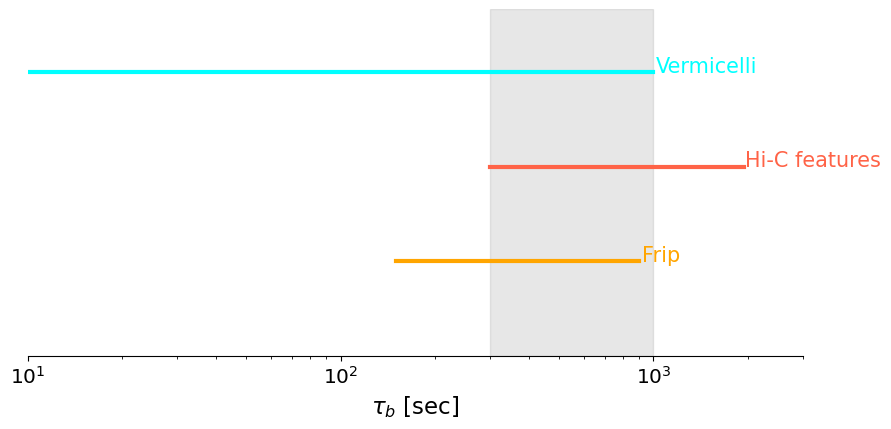

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming table_s is your DataFrame and it has already been defined and loaded.

table_s['lifetime [sec]'] = pd.to_numeric(table_s['lifetime [sec]'], errors='coerce')
table_s = table_s.dropna(subset=['lifetime [sec]'])

plt.figure(figsize=(10, 4.5))

# Highlighting the background between tau=300 and tau=1000
plt.axvspan(300, 1000, color='grey', alpha=0.19)

# SPT
deltex = 15
y_spt = 0.5
SPT = table_s[table_s['method'] == 'SPT']
#plt.plot(np.array(SPT['lifetime [sec]']), np.zeros(len(SPT)) + 0.5, linewidth=3, color='blue')
#plt.annotate('SPT', (np.array(SPT['lifetime [sec]'])[-1] + deltex / 3, y_spt), color='blue', fontsize=15)

# FRAP
y_spt = 0.5
Frap = table_s[table_s['method'] == 'FRAP']
Frap = Frap[Frap['lifetime [sec]'] > 90]
#plt.plot(np.array(Frap['lifetime [sec]']), np.zeros(len(Frap)) + 0.5, linewidth=3, color='blue')
#plt.annotate('Frap', (np.max(np.array(Frap['lifetime [sec]'])) + deltex, y_spt), color='blue', fontsize=15)

# FRIP
Frip = [150, 900]
y_frip = 1.5
deltex = 19
plt.plot(Frip, [1.5, 1.5], label='Frip', linewidth=3, color='orange')
plt.annotate('Frip', (np.max(Frip) + deltex, y_frip), color='orange', fontsize=15)

# Isolation
iso = [300, 1950]
y_iso = 3
deltex = 15
plt.plot(iso, [y_iso, y_iso], label='Tads', linewidth=3, color='tomato')
plt.annotate('Hi-C features', (iso[-1] + deltex, y_iso), color='tomato', fontsize=15)

# Dots
dots = [300, 450]
y_dot = 4
#plt.plot(dots, [y_dot, y_dot], label='Tads', linewidth=3, color='sienna')
#plt.annotate('Dots', (np.max(dots) + deltex, y_dot), color='sienna', fontsize=15)

# Vermicelli
verm = [0, 1000]
y_verm = 4.5
deltex = 15
plt.plot(verm, [y_verm, y_verm], label='Tads', linewidth=3, color='cyan')
plt.annotate('Vermicelli', (np.max(verm) + deltex, y_verm), color='cyan', fontsize=15)
plt.scatter(0, 30, alpha=1)
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.xlabel(r'$\tau_b$ [sec]', fontsize=16.5)
plt.xlim(10, 3000)
plt.xscale('log')

plt.yticks([])
plt.xticks(fontsize=14.5)
plt.ylim(0, 5.5)

import matplotlib as mpl
#plt.legend()
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.left'] = False

plt.savefig('../figs/summary_for_estimation.pdf', dpi=300, bbox_inches='tight')
#plt.axis('off')
plt.show()


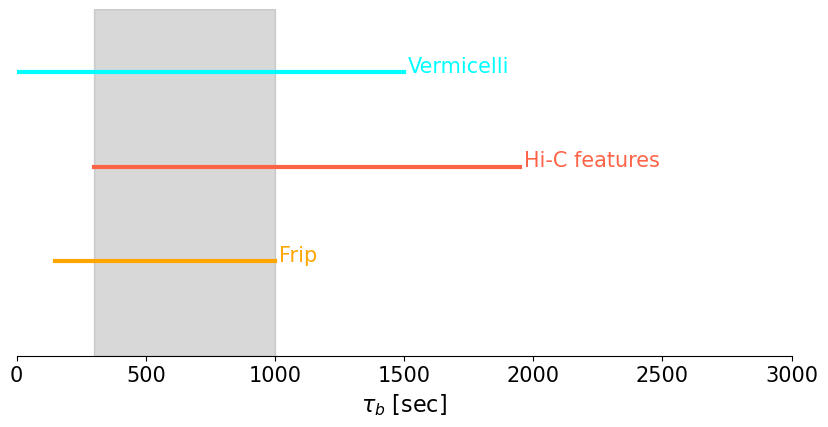

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming table_s is your DataFrame and it has already been defined and loaded.

table_s['lifetime [sec]'] = pd.to_numeric(table_s['lifetime [sec]'], errors='coerce')
table_s = table_s.dropna(subset=['lifetime [sec]'])

plt.figure(figsize=(10, 4.5))

# Highlighting the background between tau=300 and tau=1000
plt.axvspan(300, 1000, color='grey', alpha=0.3)

# SPT
deltex = 15
y_spt = 0.5
SPT = table_s[table_s['method'] == 'SPT']
#plt.plot(np.array(SPT['lifetime [sec]']), np.zeros(len(SPT)) + 0.5, linewidth=3, color='blue')
#plt.annotate('SPT', (np.array(SPT['lifetime [sec]'])[-1] + deltex / 3, y_spt), color='blue', fontsize=15)

# FRAP
y_spt = 0.5
Frap = table_s[table_s['method'] == 'FRAP']
Frap = Frap[Frap['lifetime [sec]'] > 90]
#plt.plot(np.array(Frap['lifetime [sec]']), np.zeros(len(Frap)) + 0.5, linewidth=3, color='blue')
#plt.annotate('Frap', (np.max(np.array(Frap['lifetime [sec]'])) + deltex, y_spt), color='blue', fontsize=15)

# FRIP
Frip = [150, 1000]
y_frip = 1.5
deltex = 15
plt.plot(Frip, [1.5, 1.5], label='Frip', linewidth=3, color='orange')
plt.annotate('Frip', (np.max(Frip) + deltex, y_frip), color='orange', fontsize=15)

# Isolation
iso = [300, 1950]
y_iso = 3
deltex = 15
plt.plot(iso, [y_iso, y_iso], label='Tads', linewidth=3, color='tomato')
plt.annotate('Hi-C features', (iso[-1] + deltex, y_iso), color='tomato', fontsize=15)

# Dots
dots = [300, 450]
y_dot = 4
#plt.plot(dots, [y_dot, y_dot], label='Tads', linewidth=3, color='sienna')
#plt.annotate('Dots', (np.max(dots) + deltex, y_dot), color='sienna', fontsize=15)

# Vermicelli
verm = [0, 1500]
y_verm = 4.5
deltex = 15
plt.plot(verm, [y_verm, y_verm], label='Tads', linewidth=3, color='cyan')
plt.annotate('Vermicelli', (np.max(verm) + deltex, y_verm), color='cyan', fontsize=15)

frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.xlabel(r'$\tau_b$ [sec]', fontsize=16)
#plt.xscale('log')
plt.xlim(0, 3000)
plt.yticks([])
plt.xticks(fontsize=15)
plt.ylim(0, 5.5)

import matplotlib as mpl
#plt.legend()
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.left'] = False

plt.savefig('../images/experimental_for_one_d.pdf', dpi=300, bbox_inches='tight')
#plt.axis('off')
plt.show()


In [ ]:
table_s['lifetime [sec]'] = pd.to_numeric(table_s['lifetime [sec]'], errors='coerce')

table_s = table_s.dropna(subset=['lifetime [sec]'])



plt.figure(figsize=(10,4.5))


### experimental 
#SPT
deltex=15
y_spt = 0.5
SPT = table_s[table_s['method']=='SPT']
#plt.plot(np.array(SPT['lifetime [sec]']),np.zeros(len(SPT))+0.5, linewidth=3,color='blue')
#plt.annotate('SPT',(np.array(SPT['lifetime [sec]'])[-1]+deltex/3,y_spt),color='blue',fontsize=15)
#Frap
y_spt = 0.5
Frap = table_s[table_s['method']=='FRAP']
Frap = Frap[Frap['lifetime [sec]']>90]
#plt.plot(np.array(Frap['lifetime [sec]']),np.zeros(len(Frap))+0.5, linewidth=3,color='blue')
#plt.annotate('Frap',(np.max(np.array(Frap['lifetime [sec]']))+deltex,y_spt),color='blue',fontsize=15)
#Frip
Frip = [150, 1500]
y_frip = 1.5
deltex=15
plt.plot(Frip,[1.5,1.5],label='Frip', linewidth=3,color = 'orange')
plt.annotate('Frip',(np.max(Frip)+deltex,y_frip),color='orange',fontsize = 15)

#plot for Isolation
iso = [900, 1950]
y_iso = 3
deltex=15
plt.plot(iso,[y_iso,y_iso],label='Tads', linewidth=3,color = 'tomato')
plt.annotate('Tads',(iso[-1]+deltex,y_iso),color='tomato',fontsize = 15)
#plot for dots
dots = [300, 450]
y_dot = 4

plt.plot(dots,[y_dot,y_dot],label='Tads', linewidth=3,color = 'sienna')
plt.annotate('Dots',(np.max(dots)+deltex,y_dot),color='sienna',fontsize = 15)
#plot for Vermicelli
verm = [0, 1500]
y_verm = 5
deltex=15
plt.plot(verm,[y_verm,y_verm],label='Tads', linewidth=3,color = 'cyan')
plt.annotate('Vermicelli',(np.max(verm)+deltex,y_verm),color='cyan',fontsize = 15)
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.xlabel(r'$\tau_b$ [sec]', fontsize=16)
#plt.xscale('log')
plt.xlim(0, 3000)
plt.yticks([])
plt.xticks(fontsize=15)
plt.ylim(0,5.5)
import matplotlib as mpl
#plt.legend()
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.left'] = False

plt.savefig('../images/experimental_for_one_d.pdf',ppt=300,bbox_inches='tight')

#plt.axis('off')

plt.show()


/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


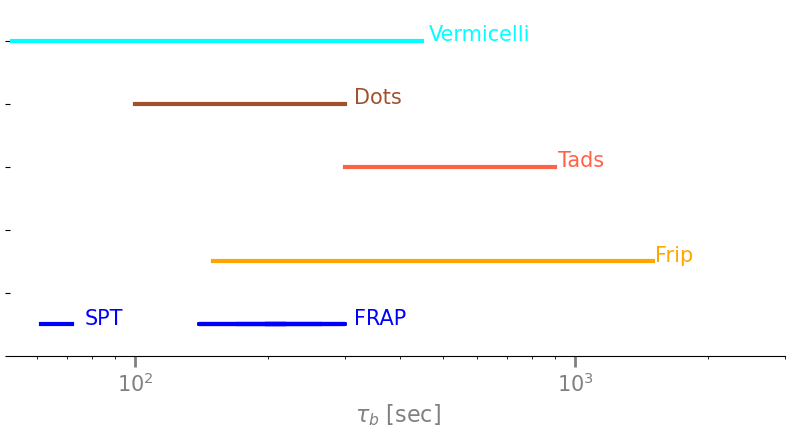

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Convert 'lifetime [sec]' column to numeric and drop NaN values
table_s['lifetime [sec]'] = pd.to_numeric(table_s['lifetime [sec]'], errors='coerce')
table_s = table_s.dropna(subset=['lifetime [sec]'])

plt.figure(figsize=(10, 4.5))

# Experimental data
# SPT
SPT = table_s[table_s['method'] == 'SPT']
plt.plot(np.array(SPT['lifetime [sec]']), np.zeros(len(SPT)) + 0.5, linewidth=3, color='blue')
plt.annotate('SPT', (np.array(SPT['lifetime [sec]'])[-1] + 15 / 3, 0.5), color='blue', fontsize=15)

# FRAP
Frap = table_s[(table_s['method'] == 'FRAP') & (table_s['lifetime [sec]'] > 90)]
plt.plot(np.array(Frap['lifetime [sec]']), np.zeros(len(Frap)) + 0.5, linewidth=3, color='blue')
plt.annotate('FRAP', (np.max(np.array(Frap['lifetime [sec]'])) + 15, 0.5), color='blue', fontsize=15)

# Frip
frip_range = [150, 1500]
plt.plot(frip_range, [1.5, 1.5], label='Frip', linewidth=3, color='orange')
plt.annotate('Frip', (frip_range[1] + 19, 1.5), color='orange', fontsize=15)

# Isolation
plt.plot([300, 900], [3, 3], label='Tads', linewidth=3, color='tomato')
plt.annotate('Tads', (900 + 15, 3), color='tomato', fontsize=15)

# Dots
plt.plot([100, 300], [4, 4], label='Tads', linewidth=3, color='sienna')
plt.annotate('Dots', (300 + 15, 4), color='sienna', fontsize=15)

# Vermicelli
plt.plot([0, 450], [5, 5], label='Tads', linewidth=3, color='cyan')
plt.annotate('Vermicelli', (450 + 15, 5), color='cyan', fontsize=15)

# Customize x-axis
plt.xlabel(r'$\tau_b$ [sec]', fontsize=16, color='grey')  # Grey color
plt.xscale('log')
plt.xlim(0, 3000)
plt.xticks(fontsize=15)
plt.tick_params(axis='x', colors='grey', width=2, length=8)  # Thicker axis and grey color

# Add arrow at the end of the x-axis
plt.annotate('', xy=(3000, -0.5), xytext=(2800, -0.5), arrowprops=dict(facecolor='grey', arrowstyle='->'))

plt.ylim(0, 5.5)

# Remove y-axis tick labels
plt.gca().axes.yaxis.set_ticklabels([])

plt.savefig('experimental_for_one_d.png', dpi=300, bbox_inches='tight')
plt.show()
